### Introduction to Time-Based Filters
 
We have typically looked at frequency content only by examining the magnitude spectrum with the help of the `pyplot` library. We have seen the effect of multiplying two signals together when we introduced envelopes, and later AM and FM synthesis. In a similar way that AM or FM synthesis can be applied in the time domain to control a particular desired effect in the frequency domain, we can apply basic filtering concepts (like high or low pass filters) through controlling the time domain.

This allows us to shape signals in the time domain to emphasize or suppress specific frequency components.
 
#### How we we filter from the time domain?
 
 A time-based filter applies a mathematical operation to a signal **over time** to modify its frequency content. 
 
 These filters are implemented using **convolution**, where an input signal \( x[n] \) is convolved with a filter kernel (impulse response) \( h[n] \):
 

$$ y[n] = \sum_{k=-\infty}^{\infty} x[k] h[n-k]$$
 
 This operation applies a weighted sum of past and present signal values.

 

#### Moving Average Filter (A Simple Low-Pass Filter)
 
 One of the simplest time-based filters is the **Moving Average Filter**. It smooths a signal by averaging a number of consecutive samples.
 
$$ y[n] = \frac{1}{M} \sum_{k=0}^{M-1} x[n-k]$$
 
 This is equivalent to convolving $x[n]$ with a filter $h[n]$ of length $M$:

$$ h[n] = \frac{1}{M}, \quad 0 \leq n < M $$
 


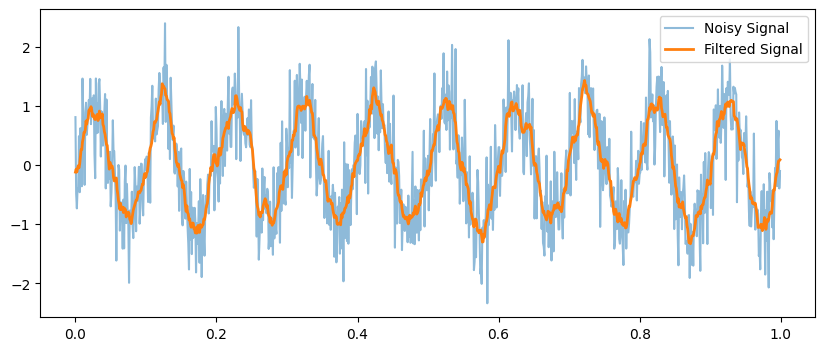

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a noisy signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.randn(fs)

# Define a moving average filter (M = 10)
M = 10
h = np.ones(M) / M  # Filter kernel
filtered_signal = np.convolve(signal, h, mode='same')  # Apply convolution

# Plot the original and filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, alpha=0.5, label="Noisy Signal")
plt.plot(t, filtered_signal, linewidth=2, label="Filtered Signal")
plt.legend()
plt.show()

#### Impulse Response and Frequency Behavior
 
 - A **low-pass filter** attenuates high frequencies by averaging adjacent samples, effectively smoothing the signal.
 - A **high-pass filter** can be implemented by subtracting a low-pass filtered version from the original signal.
 
The **impulse response** of a filter determines its effect on different frequencies.  


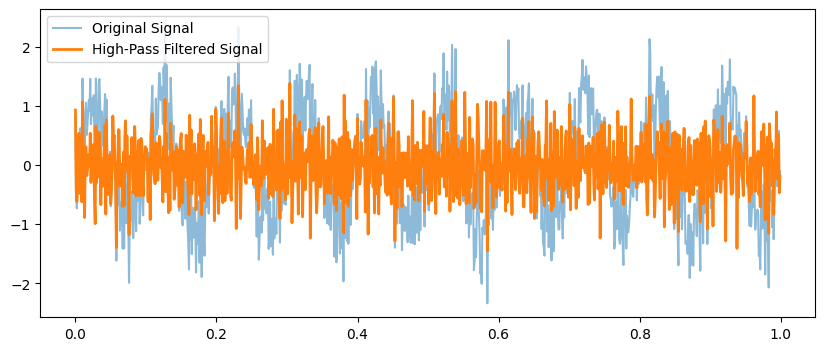

In [2]:
# Example:
# Applying a **high-pass filter** by subtracting the moving average result:
high_pass_signal = signal - filtered_signal

# Plot high-pass filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, alpha=0.5, label="Original Signal")
plt.plot(t, high_pass_signal, linewidth=2, label="High-Pass Filtered Signal")
plt.legend()
plt.show()

#### Filters and the frequency response

In the above examples, we can filter the signal by simple convolution or a windowed "averaging" of the signal over time. The length of the window will affect how much 'smoothing' of the signal there is and therefore a greater value of $M$ will lead to greater high-frequency removal. Since we were using a simple rectangular window (i.e., our "filter" is simply a value of 1 across the whole window), we may think that there is no frequency response. However, we can think of this as a flat line and this does have a very specific frequency response called a *sinc* function.

#### Understanding the Sinc Function in Low-Pass Filtering
 
 The sinc function is fundamental in signal processing because it defines 
 the *ideal* low-pass filter in the time domain.
 
 The sinc function is given by:
 

$$ \text{sinc}(x) = \frac{\sin(\pi x)}{\pi x} $$
 
 This function represents the **impulse response of an ideal low-pass filter**, 
 meaning it perfectly passes frequencies below a certain cutoff and blocks everything else.
 
 However, a true sinc function is **infinite**, so we must truncate it in practice.

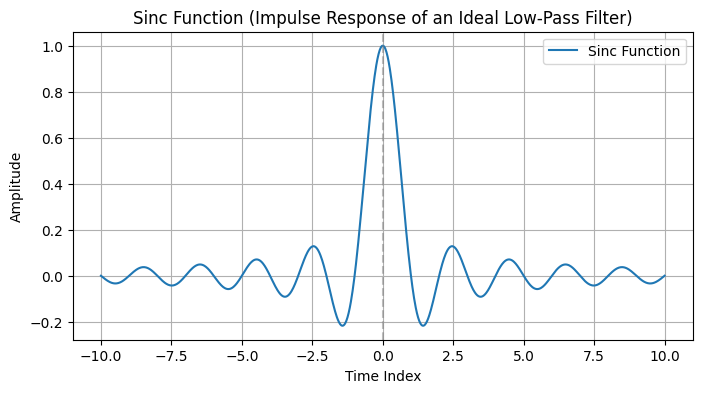

In [3]:
# Define sinc function
x = np.linspace(-10, 10, 1000)
sinc_func = np.sinc(x)  # NumPy's sinc(x) is normalized as sin(pi*x)/(pi*x)

# Plot sinc function
plt.figure(figsize=(8, 4))
plt.plot(x, sinc_func, label="Sinc Function")
plt.axvline(0, color="gray", linestyle="--", alpha=0.5)
plt.title("Sinc Function (Impulse Response of an Ideal Low-Pass Filter)")
plt.xlabel("Time Index")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()



 
 - A **rectangular window in frequency** (ideal low-pass) corresponds to a **sinc function in time**.
 - The sinc function oscillates, which causes some artifacts when truncated.
 - To create a practical low-pass filter, we **multiply sinc by a window function** (e.g., Hamming window).
  
A common FIR low-pass filter is the **Hamming-windowed sinc filter**, which avoids the sharp cutoffs of a simple moving average. Essentially we 'smooth the ends' of the filter to avoid these artifacts, much like in fourier applications like the short time fourier transform.

Effectively, the filter (window) applies a weighted sum of delayed inputs to shape the output.
 

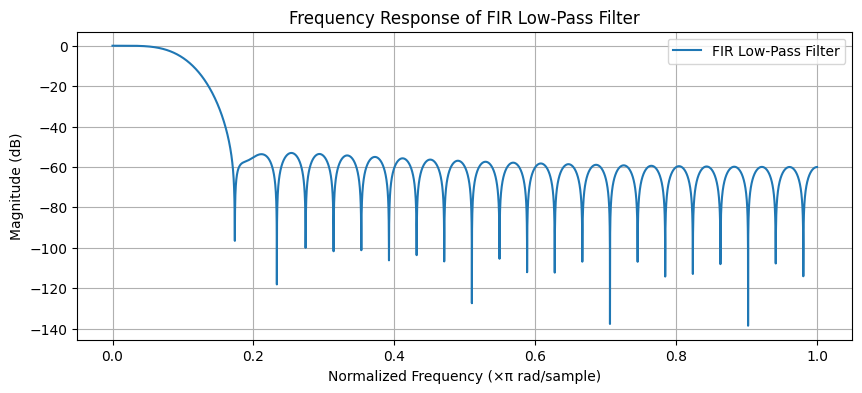

In [4]:
# from your friend chat GPT :)
# **Example: FIR Low-Pass Filter Using a Windowed Sinc Function**
from scipy.signal import firwin, freqz

# Design an FIR low-pass filter
num_taps = 51  # Filter length
cutoff = 0.1  # Normalized cutoff frequency (0 to 1)
fir_coeffs = firwin(num_taps, cutoff, window="hamming")

# Frequency response
w, h = freqz(fir_coeffs, worN=8000)

plt.figure(figsize=(10, 4))
plt.plot(w / np.pi, 20 * np.log10(abs(h)), label="FIR Low-Pass Filter")
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Magnitude (dB)")
plt.title("Frequency Response of FIR Low-Pass Filter")
plt.grid()
plt.legend()
plt.show()

The challenge with a moving average filter (or any time-domain filter) is that its frequency response is not directly defined in Hz—it depends on the filter’s impulse response length and shape.

To get precise frequency control, we need to connect time-domain parameters (e.g., filter length, shape) to their frequency-domain behavior.

#### Controlling the Cutoff Frequency in the Time Domain
 
 To achieve a **specific cutoff frequency** \( f_c \) in Hz, we can determine the required filter length \( M \).
 
 The relationship between the filter length and cutoff frequency is roughly:
 
$$
 M = \frac{0.443 f_s}{f_c}
$$
 
 - **\( f_s \)** is the sampling frequency in Hz.
 - **\( f_c \)** is the desired cutoff frequency in Hz.
 - **\( M \)** is the number of samples in the moving average filter.
 
 

 **Example: Designing a Moving Average Filter with a Specific Cutoff**
 
 Suppose we want a **1 kHz low-pass filter** at a sampling rate of **10 kHz**:
$$
 M = \frac{0.443 \times 10000}{1000} = 4.43
$$
 
 Since \( M \) must be an integer, we round to \( M = 4 \) or \( M = 5 \).

/tmp/ipykernel_103889/13922384.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(H)), label="Moving Average Filter")


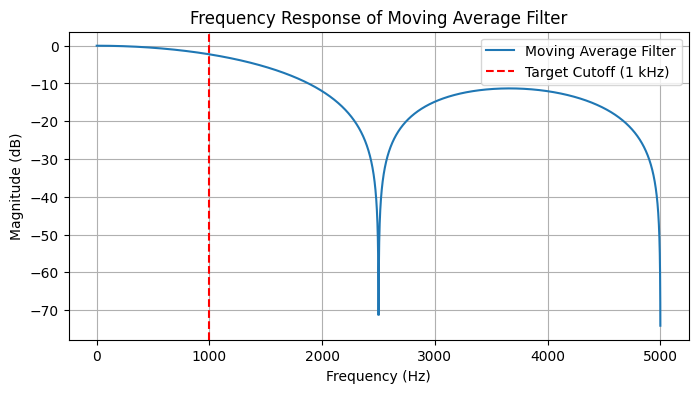

Chosen filter length M: 4


In [6]:
from scipy.signal import freqz

# Sampling rate and desired cutoff frequency
fs = 10000   #Sampling frequency (Hz)
fc = 1000    # Desired cutoff frequency (Hz)

# Compute filter length using M = 0.443 * fs / fc
M = int(round(0.443 * fs / fc))   # Ensure it's an integer

# Create moving average filter kernel
h = np.ones(M) / M

# Compute frequency response
w, H = freqz(h, worN=8000, fs=fs)

# Visuzalize:
plt.figure(figsize=(8, 4))
plt.plot(w, 20 * np.log10(abs(H)), label="Moving Average Filter")
plt.axvline(fc, color="r", linestyle="--", label="Target Cutoff (1 kHz)")
plt.title("Frequency Response of Moving Average Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.legend()
plt.show()

print(f"Chosen filter length M: {M}")



### Recap
 
Time-based filters modify signals by **convolution** with a filter, which is essentially a window function. Filter design is a balance between time-domain smoothness and frequency-domain sharpness.

* The **Moving Average Filter** is a simple **low-pass filter** that smooths signals.

* A simple **high-pass filter** can be obtained by subtracting the low-pass result.

* More advanced filters (e.g., **FIR filters**) use windowed sinc functions to shape the frequency response.

* The **moving average filter** acts as a **low-pass filter** with a cutoff frequency determined by M.

* The **longer** the filter (larger M), the **sharper** the frequency cutoff.

* The roll-off is **not very sharp**—for better performance, we use **windowed sinc filters**.